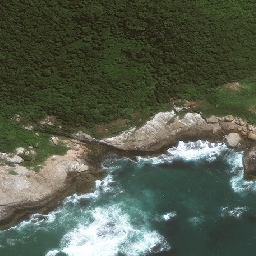

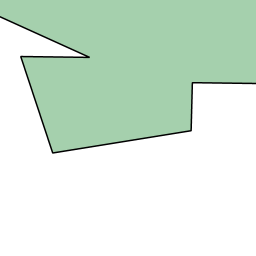

In [82]:
import cv2
import numpy as np
import os

from PIL import Image
from IPython.display import display

im = Image.open('n41p6948722325_n22p4055718965_n41p6928167264_n22p4028294504_raw.png')
gt= Image.open('n41p6948722325_n22p4055718965_n41p6928167264_n22p4028294504_gt.png')
ima = np.asarray(im, dtype=np.uint8)
gta = np.load('n41p6948722325_n22p4055718965_n41p6928167264_n22p4028294504.npy')
display (im)
display (gt)

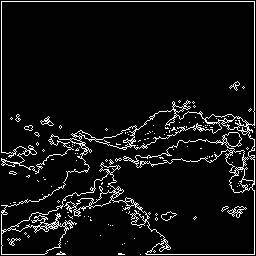

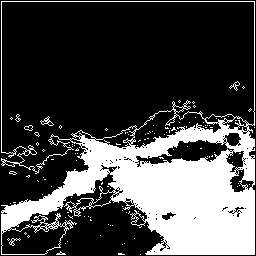

In [80]:
img = cv2.imread('n41p6948722325_n22p4055718965_n41p6928167264_n22p4028294504_raw.png',0)
ret, thresh = cv2.threshold(img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
#np.histogram(thresh)
#imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#ret,thresh = cv2.threshold(img,0,255,0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
cimt = np.ones((256,256),dtype=np.uint8)
cv2.drawContours(cimt,contours,-1,255,1)
areas = [cv2.contourArea(cnt) for cnt in contours ]
display (Image.fromarray(cimt))
h = np.mean(areas)
np.std(areas)
mask = np.zeros((258,258), np.uint8)
cv2.floodFill(cimt,mask,(250,250),255,0,255)
display (Image.fromarray(cimt))

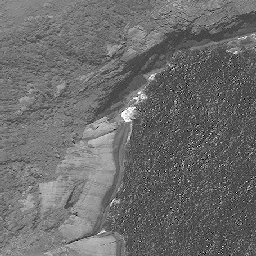

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]], dtype=uint8)

In [97]:
im = Image.open('n41p940975909_n22p8723511097_n41p9389283747_n22p8696087029_raw.png')
display (im)
ima = cv2.imread('n41p940975909_n22p8723511097_n41p9389283747_n22p8696087029_raw.png',0)
gta = np.load('n41p940975909_n22p8723511097_n41p9389283747_n22p8696087029.npy')

In [96]:
rows = [i for i in xrange(gta.shape[0]) if sum(gta[i,:])==gta.shape[1]]
cols = [i for i in xrange(gta.shape[1]) if sum(gta[:,i])==gta.shape[0]]
mask = np.zeros(gta.shape)
mask[rows,:] = 255
mask[:,cols] = 255
mask

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

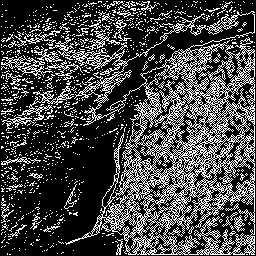

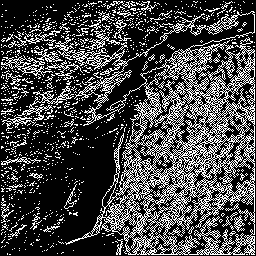

In [103]:
ret, thresh = cv2.threshold(ima,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
#np.histogram(thresh)
#imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#ret,thresh = cv2.threshold(img,0,255,0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
cimt = np.ones((256,256),dtype=np.uint8)
cv2.drawContours(cimt,contours,-1,255,1)
display (Image.fromarray(cimt))
mask = np.zeros((258,258), np.uint8)
cv2.floodFill(cimt,mask,(250,250),255,0,255)
display (Image.fromarray(cimt))

In [106]:
import random
random.randrange(0,255)

114

In [ ]:
from skimage.feature import greycomatrix, greycoprops
from skimage import data
import matplotlib.pyplot as plt

PATCH_SIZE = 21
grass_locations = list()
grass_patches = []
water_locations = list()
water_patches = []
while(True):
  if len(grass_patches)==10:
     break;
  i = random.randrange(0,255-PATCH_SIZE)
  j = random.randrange(0,255-PATCH_SIZE)
  if gta[i,j] == 0:
      grass_patches.append(ima[i:i+PATCH_SIZE,j:j+PATCH_SIZE])
      grass_locations.append((i,j))
        
while(True):
  if len(water_patches)==10:
     break;
  i = random.randrange(0,255-PATCH_SIZE)
  j = random.randrange(0,255-PATCH_SIZE)
  if gta[i,j] == 1:
      water_patches.append(ima[i:i+PATCH_SIZE,j:j+PATCH_SIZE])  
      water_locations.append((i,j))
  
xs = []
ys = []
for patch in (grass_patches + water_patches):
    glcm = greycomatrix(patch, [5], [0], 256, symmetric=True, normed=True)
    xs.append(greycoprops(glcm, 'dissimilarity')[0, 0])
    ys.append(greycoprops(glcm, 'correlation')[0, 0])
    
    
fig = plt.figure(figsize=(8, 8))

# display original image with locations of patches
ax = fig.add_subplot(3, 2, 1)
ax.imshow(ima, cmap=plt.cm.gray, interpolation='nearest',
          vmin=0, vmax=255)
for (y, x) in grass_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'gs')
for (y, x) in water_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'bs')
ax.set_xlabel('Original Image')
ax.set_xticks([])
ax.set_yticks([])
ax.axis('image')

# for each patch, plot (dissimilarity, correlation)
ax = fig.add_subplot(3, 2, 2)
ax.plot(xs[:len(grass_patches)], ys[:len(grass_patches)], 'go',
        label='Grass')
ax.plot(xs[len(grass_patches):], ys[len(grass_patches):], 'bo',
        label='Water')
ax.set_xlabel('GLCM Dissimilarity')
ax.set_ylabel('GLVM Correlation')
ax.legend()

for i, patch in enumerate(grass_patches):
    ax = fig.add_subplot(3, len(grass_patches), len(grass_patches)*1 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray, interpolation='nearest',
              vmin=0, vmax=255)
    ax.set_xlabel('Grass %d' % (i + 1))

for i, patch in enumerate(water_patches):
    ax = fig.add_subplot(3, len(water_patches), len(water_patches)*2 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray, interpolation='nearest',
              vmin=0, vmax=255)
    ax.set_xlabel('Water %d' % (i + 1))


# display the patches and plot
fig.suptitle('Grey level co-occurrence matrix features', fontsize=14)
plt.show()


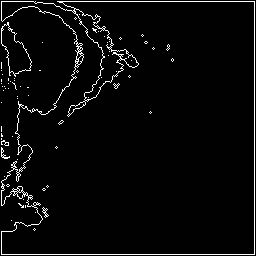

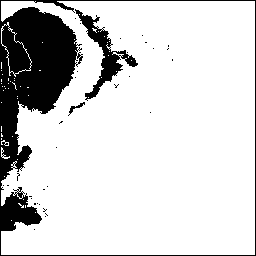

In [98]:
img = cv2.imread('n41p7129455526_n22p422088963_n41p7108906306_n22p4193465198_raw.png',0)
ret, thresh = cv2.threshold(img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
#np.histogram(thresh)
#imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#ret,thresh = cv2.threshold(img,0,255,0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
cimt = np.ones((256,256),dtype=np.uint8)
cv2.drawContours(cimt,contours,-1,255,1)
display (Image.fromarray(cimt))
mask = np.zeros((258,258), np.uint8)
cv2.floodFill(cimt,mask,(250,250),255,0,255)
display (Image.fromarray(cimt))